<a href="https://colab.research.google.com/github/Smrtcoder/superstore-python-analysis/blob/main/superstore_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Sales Analysis with Python

**Objective:** Analyze sales and profit data using Python to identify revenue drivers, margin risks, and performance trends that support business decision-making.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)


In [ ]:
df = pd.read_csv("SuperstoreSample_Analysis_Hayward Collins - Raw Data.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Order Month,Profit
0,1,CA-2016-152156,11/8/2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,2016-11,41.9136
1,2,CA-2016-152156,11/8/2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,2016-11,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,2016-06,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,2015-10,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2015-10,2.5164


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Order Month   9994 non-null 

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month


In [ ]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

total_sales, total_profit


(np.float64(2297200.8603000003), np.float64(286397.0217))

In [ ]:
sales_by_category = (
    df.groupby('Category')['Sales']
      .sum()
      .sort_values(ascending=False)
)

sales_by_category


,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


sales_by_category.plot(kind='bar', title='Sales by Category')
plt.ylabel('Sales')
plt.show()


In [ ]:
profit_by_region = (
    df.groupby('Region')['Profit']
      .sum()
      .sort_values(ascending=False)
)

profit_by_region


,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


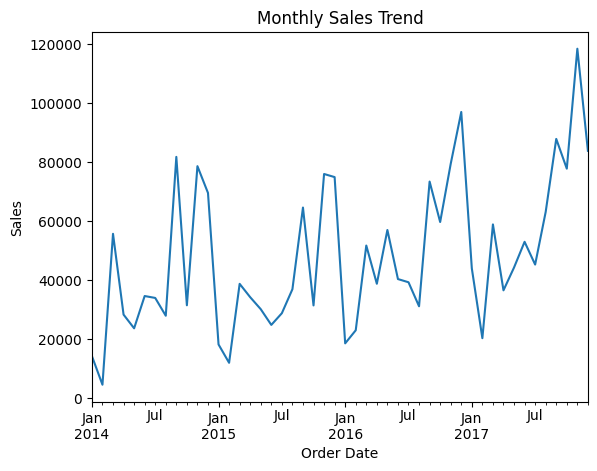

In [ ]:
monthly_sales = (
    df.groupby(df['Order Date'].dt.to_period('M'))['Sales']
      .sum()
)

monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()


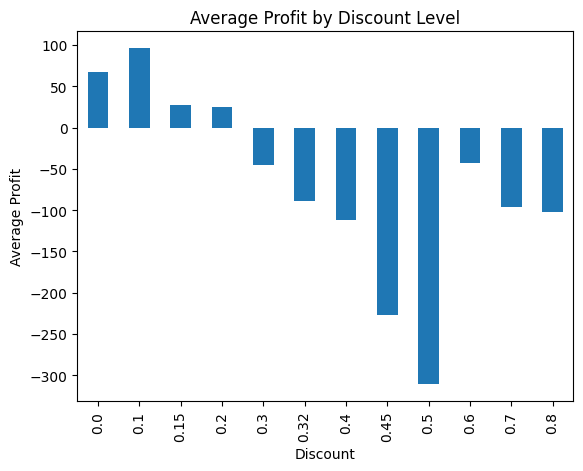

In [ ]:
discount_profit = df.groupby('Discount')['Profit'].mean()

discount_profit.plot(kind='bar', title='Average Profit by Discount Level')
plt.ylabel('Average Profit')
plt.show()


## Key Insights
• Technology leads overall revenue, but profitability varies by region.  
• Higher discount levels are associated with lower average profit.  
• Sales peak toward the end of the year, showing strong seasonality.


## Recommendations
• Limit discounting on low-margin products and regions.  
• Prioritize inventory and marketing planning ahead of Q4.  
• Focus growth efforts on high-margin categories, not just high sales.
